In [1]:
from utils import plot_text_mel_alignment,  get_duration_from_textgrid
import os, librosa, random
import numpy as np
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
textgrid_dir = "./result/ESD/TextGrid"
wav_paths = list(glob("./preprocessed/ESD/**/**/*.wav", recursive=True))  # plot 20 samples
                
random.shuffle(wav_paths)

wav_paths = wav_paths[:20]

# mel-preprocess settings
sampling_rate = 16000
hop_length=256
win_length = 1024
n_fft = 1024
n_mels = 80
fmin, fmax = 0, 8000

0011_Angry/0011_000633.wav
['DH', 'EY1', 'HH', 'AE1', 'D', 'B', 'IH1', 'N', 'N', 'EY1', 'M', 'D', 'T', 'AA1', 'M', 'AH0', 'N', 'D', 'JH', 'EH1', 'R', 'IY0', '.', '0']
0011_Angry/0011_000404.wav
['AA1', 'R', 'Y', 'UW1', 'AH0', 'R', 'EH1', 'G', 'Y', 'AH0', 'L', 'ER0', 'D', 'AA1', 'R', 'K', 'IY2', 'R', 'IH1', 'L', 'IY0', '?', '0']
0011_Sad/0011_001330.wav
['Y', 'AO1', 'R', 'P', 'AE1', 'TH', 'G', 'OW1', 'Z', 'S', 'AW1', 'TH', '.', '0']
0011_Sad/0011_001340.wav
['DH', 'EH1', 'R', 'G', 'OW1', 'Z', 'DH', 'AH0', 'SH', 'AO1', 'L', 'AH0', 'G', 'EH1', 'N', '!', '0']
0015_Happy/0015_000768.wav
['AY1', 'D', 'UW1', 'N', 'AA1', 'T', 'IY1', 'T', 'B', 'R', 'EH1', 'D', '.', '0']
0011_Angry/0011_000606.wav
['AY1', 'M', 'AH1', 'S', 'T', 'HH', 'AE1', 'V', 'sil', 'T', 'UW1', 'T', 'UW1', 'F', 'EH1', 'CH', 'AH0', 'N', 'D', 'K', 'AE1', 'R', 'IY0', '.', '0']
0012_Surprise/0012_001665.wav
['AY1', 'V', 'JH', 'AH1', 'S', 'T', 'SH', 'AA1', 'T', 'sil', 'AH0', 'S', 'T', 'AE1', 'G', '.', '0']
0012_Surprise/0012_001734

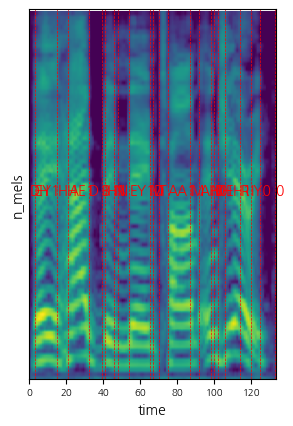

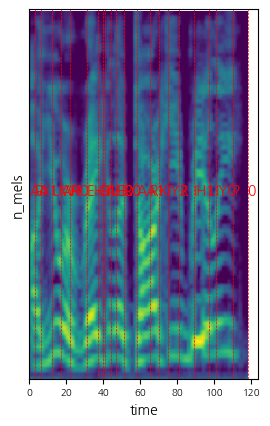

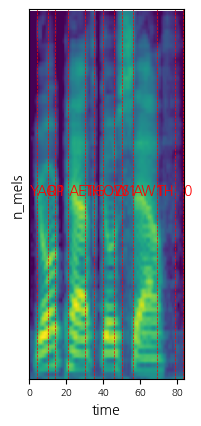

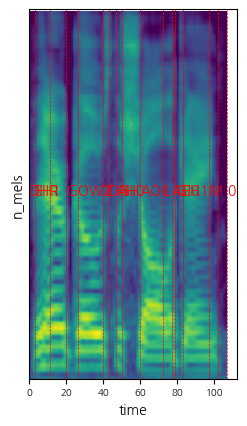

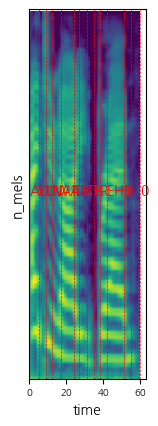

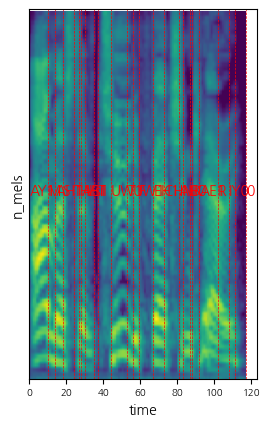

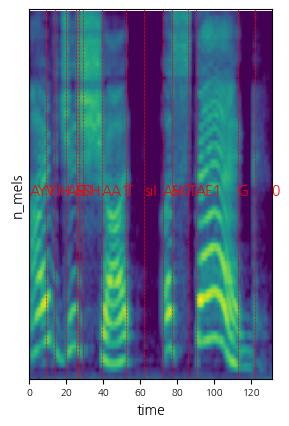

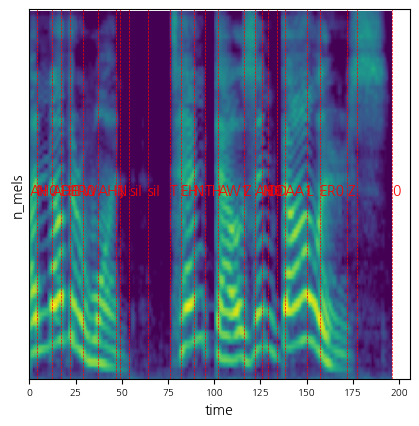

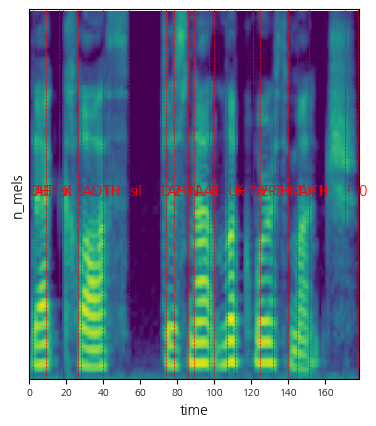

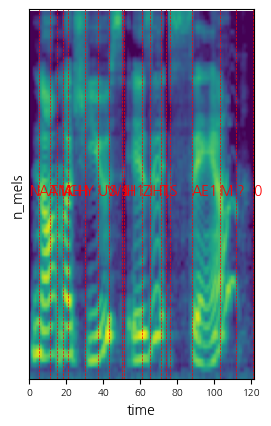

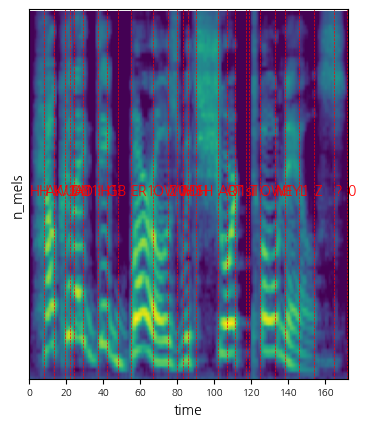

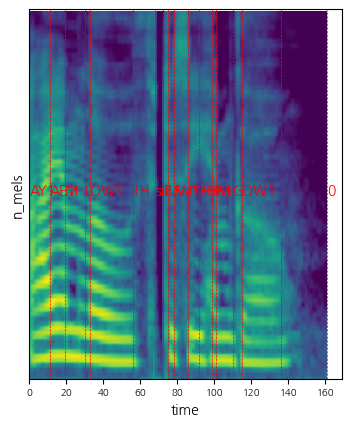

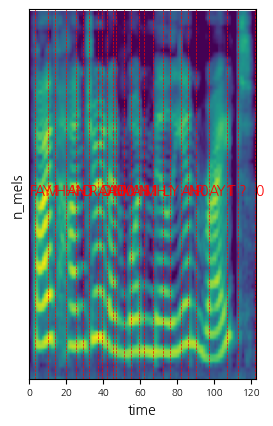

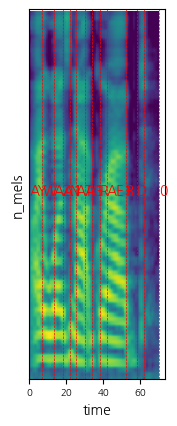

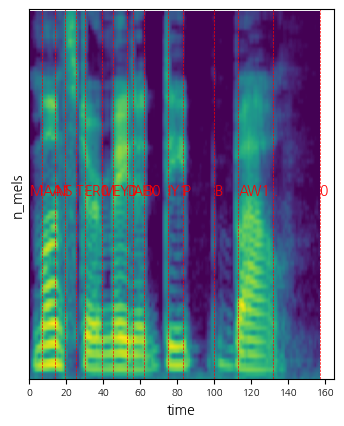

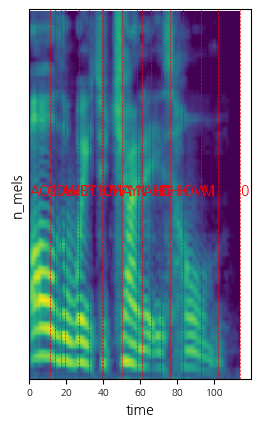

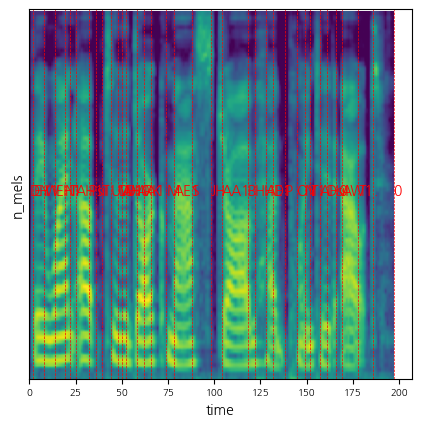

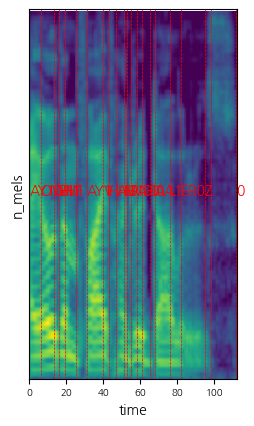

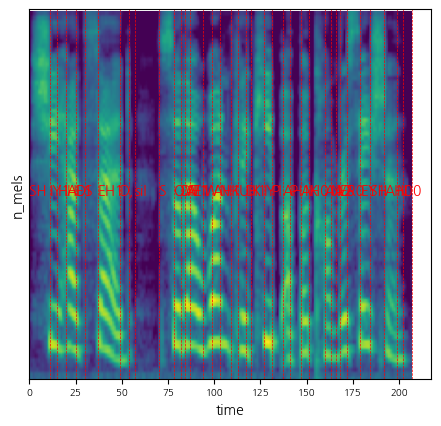

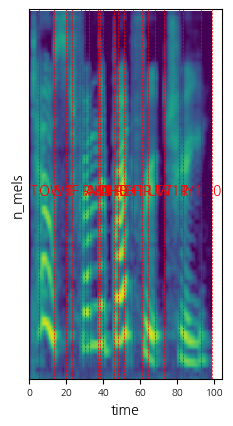

In [4]:
%matplotlib inline

for wav_path in wav_paths:
    wav_filename = "/".join(wav_path.split("/")[-2:])
    textgrid_filepath = os.path.join(textgrid_dir, wav_filename.replace(".wav", ".TextGrid"))
    
    phone_sequence, durations, start_time, end_time = get_duration_from_textgrid(textgrid_filepath, sampling_rate=sampling_rate, hop_length=hop_length)
    phone_sequence.append("0")
    durations.insert(0, 0)
    segmentation_boundary = np.cumsum(durations)
    
    wav, sr = librosa.load(wav_path, sr=sampling_rate)
    
    if sr != sampling_rate:
        print("[ERROR] sampling rate doesn't match! ({}) vs ({})".format(sr, sampling_rate))
        break
        
    mel = librosa.feature.melspectrogram(y=wav[start_time:end_time], sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, win_length=win_length,
                                                fmin=fmin, fmax=fmax, n_mels=n_mels)
    
    mel = librosa.power_to_db(mel, ref=np.max)
    
    print(wav_filename)
    print(phone_sequence)
    plot_text_mel_alignment(mel, segmentation_boundary, phone_sequence)